
# Radiation Basics
This notebook explores the principles of radiation as presented in the chapter, focusing on:
- Electromagnetic spectrum
- Blackbody radiation
- Radiation definitions and terms
- Attenuation of radiation
- Spectral distributions and Planck's law
- Stefan-Boltzmann law and Wien's displacement law
- Practical examples and computations

Each section provides explanations, Python implementations of formulas, and example calculations with visualizations.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def plancks_law(wavelength, temperature):
    """
    Calculate spectral radiance using Planck's Law.
    
    Parameters:
    wavelength: Wavelength in meters
    temperature: Temperature in Kelvin
    
    Returns:
    Spectral radiance in W/m^2/sr/m
    """
    h = 6.626e-34  # Planck's constant (J·s)
    c = 3.0e8      # Speed of light (m/s)
    k = 1.38e-23   # Boltzmann constant (J/K)
    
    exponent = (h * c) / (wavelength * k * temperature)
    return (2 * h * c**2) / (wavelength**5 * (np.exp(exponent) - 1))

# Example: Spectral radiance for the Sun (6000 K) and Earth (288 K)
wavelengths = np.logspace(-7, -5, 500)  # Wavelength range in meters
sun_temp = 6000  # Sun temperature in Kelvin
earth_temp = 288  # Earth temperature in Kelvin

sun_radiance = plancks_law(wavelengths, sun_temp)
earth_radiance = plancks_law(wavelengths, earth_temp)

plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e6, sun_radiance, label="Sun (6000 K)")
plt.plot(wavelengths * 1e6, earth_radiance, label="Earth (288 K)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Wavelength (µm)")
plt.ylabel("Spectral Radiance (W/m²/sr/m)")
plt.title("Spectral Radiance of Blackbodies")
plt.legend()
plt.grid(True)
plt.show()



### Example: Stefan-Boltzmann Law
The Stefan-Boltzmann law calculates the total emitted radiation from a blackbody:

\[ B = \sigma T^4 \]

Where:
- \( B \) is the emitted flux density in \( W/m^2 \)
- \( T \) is the temperature in Kelvin
- \( \sigma \) is the Stefan-Boltzmann constant, \( 5.67 \times 10^{-8} W/m^2/K^4 \).

#### Python Example
Below, we calculate the radiance of the Earth (288 K) and the Sun (6000 K).


In [ ]:

def stefan_boltzmann(temp):
    """
    Calculate total emitted radiance using Stefan-Boltzmann Law.
    
    Parameters:
    temp: Temperature in Kelvin
    
    Returns:
    Radiance in W/m^2
    """
    sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
    return sigma * temp**4

# Example: Radiance of Earth and Sun
earth_temp = 288  # Kelvin
sun_temp = 6000  # Kelvin

earth_radiance = stefan_boltzmann(earth_temp)
sun_radiance = stefan_boltzmann(sun_temp)

print(f"Earth Radiance: {earth_radiance:.2f} W/m²")
print(f"Sun Radiance: {sun_radiance:.2e} W/m²")


In [1]:

import numpy as np

def wien_displacement(temp):
    """
    Calculate the peak wavelength of blackbody radiation using Wien's law.
    
    Parameters:
    temp: Temperature in Kelvin
    
    Returns:
    Peak wavelength in meters
    """
    b = 2.897771955e-3  # Wien's displacement constant in m·K
    return b / temp


def photon_energy(wavelength):
    """
    Calculate the energy of a photon.
    
    Parameters:
    wavelength: Wavelength in meters
    
    Returns:
    Energy in joules
    """
    h = 6.626e-34  # Planck's constant (J·s)
    c = 3.0e8      # Speed of light (m/s)
    return h * c / wavelength


def bouguer_law(flux_0, distance, extinction_coeff):
    """
    Calculate flux density attenuation using Bouguer's Law.
    
    Parameters:
    flux_0: Initial flux density (W/m²)
    distance: Distance traveled in the medium (m)
    extinction_coeff: Extinction coefficient (1/m)
    
    Returns:
    Attenuated flux density (W/m²)
    """
    return flux_0 * np.exp(-extinction_coeff * distance)


def stefan_boltzmann_gray(temp, emissivity=0.97):
    """
    Calculate total emitted radiance for a gray body using Stefan-Boltzmann Law.
    
    Parameters:
    temp: Temperature in Kelvin
    emissivity: Emissivity of the surface (default is 0.97)
    
    Returns:
    Radiance in W/m²
    """
    sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²/K⁴)
    return emissivity * sigma * temp**4


# Example usage of additional functions
temp_earth = 288  # Earth temperature in Kelvin
temp_sun = 6000   # Sun temperature in Kelvin

peak_wavelength_earth = wien_displacement(temp_earth)
peak_wavelength_sun = wien_displacement(temp_sun)

photon_energy_example = photon_energy(500e-9)  # 500 nm wavelength

flux_initial = 1000  # Initial flux density (W/m²)
distance_medium = 2  # Distance in meters
extinction_coefficient = 0.1  # Extinction coefficient (1/m)

attenuated_flux = bouguer_law(flux_initial, distance_medium, extinction_coefficient)

print(f"Peak wavelength of Earth: {peak_wavelength_earth:.2e} m")
print(f"Peak wavelength of Sun: {peak_wavelength_sun:.2e} m")
print(f"Photon energy at 500 nm: {photon_energy_example:.2e} J")
print(f"Attenuated flux after {distance_medium} m: {attenuated_flux:.2f} W/m²")


Peak wavelength of Earth: 1.01e-05 m
Peak wavelength of Sun: 4.83e-07 m
Photon energy at 500 nm: 3.98e-19 J
Attenuated flux after 2 m: 818.73 W/m²


Example 10.1: PPFD = 0.0021 µmol m⁻² s⁻¹
Example 10.2: Red Band Irradiance = 169 W/m²


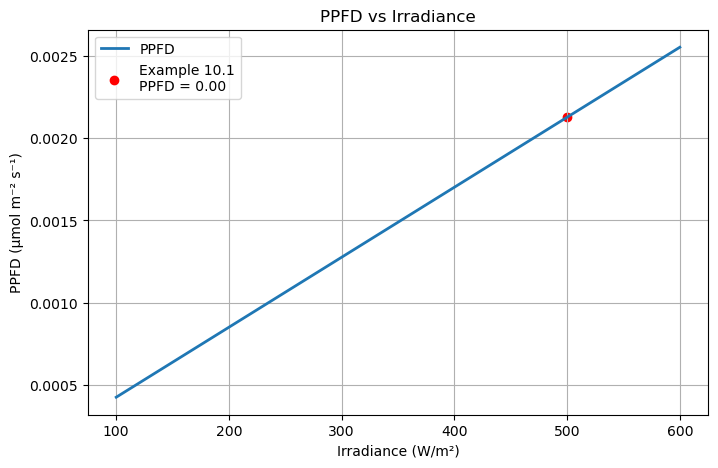

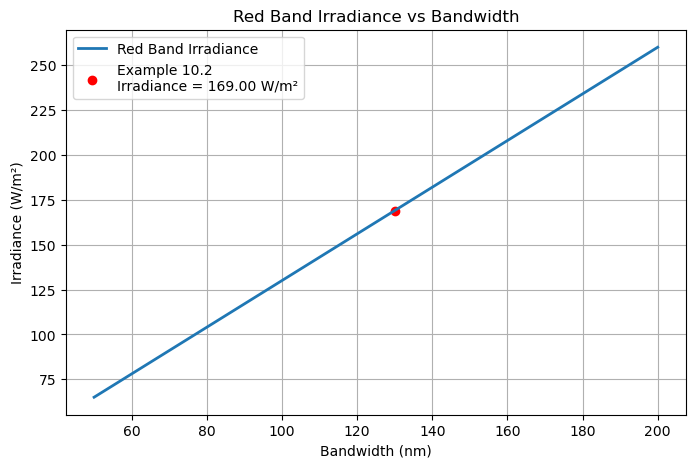

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example 10.1: Converting irradiance to PPFD
def example_10_1(irradiance, energy_content):
    ppfd = irradiance / energy_content  # PPFD calculation
    return ppfd

# Example 10.2: Calculating irradiance in the red band
def example_10_2(spectral_flux_density, bandwidth):
    irradiance = spectral_flux_density * bandwidth  # Irradiance calculation
    return irradiance

# Constants for the examples
energy_content_par = 2.35e5  # J/mol for PAR (Photosynthetically Active Radiation)
irradiance_par = 500  # W/m² in the PAR waveband
spectral_flux_density_red = 1.3  # W/m²/nm for the red band
bandwidth_red = 130  # nm for the red band

# Perform calculations
ppfd = example_10_1(irradiance_par, energy_content_par)
irradiance_red = example_10_2(spectral_flux_density_red, bandwidth_red)

# Display results
print(f"Example 10.1: PPFD = {ppfd:.4f} µmol m⁻² s⁻¹")
print(f"Example 10.2: Red Band Irradiance = {irradiance_red:.0f} W/m²")

# Plotting for visualization
# Example 10.1: Energy Content vs PPFD
irradiance_values = np.linspace(100, 600, 50)
ppfd_values = irradiance_values / energy_content_par

plt.figure(figsize=(8, 5))
plt.plot(irradiance_values, ppfd_values, label='PPFD', lw=2)
plt.scatter([irradiance_par], [ppfd], color='red', label=f'Example 10.1\nPPFD = {ppfd:.2f}')
plt.title("PPFD vs Irradiance")
plt.xlabel("Irradiance (W/m²)")
plt.ylabel("PPFD (µmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.show()

# Example 10.2: Spectral Flux vs Irradiance
bandwidth_values = np.linspace(50, 200, 50)
irradiance_values_red = spectral_flux_density_red * bandwidth_values

plt.figure(figsize=(8, 5))
plt.plot(bandwidth_values, irradiance_values_red, label='Red Band Irradiance', lw=2)
plt.scatter([bandwidth_red], [irradiance_red], color='red', label=f'Example 10.2\nIrradiance = {irradiance_red:.2f} W/m²')
plt.title("Red Band Irradiance vs Bandwidth")
plt.xlabel("Bandwidth (nm)")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


Example 10.3: Irradiance under isotropic radiation = 157.08 W/m²


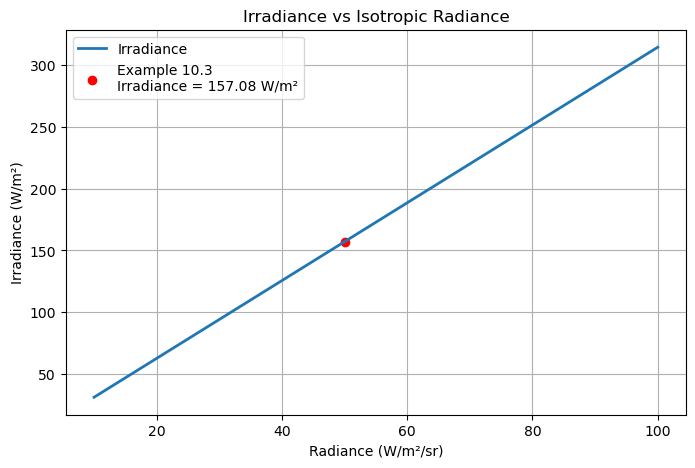

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example 10.3: Irradiance under isotropic radiation
def example_10_3(isotropic_radiance):
    """
    Calculate irradiance under isotropic radiation.

    Args:
    isotropic_radiance: Radiance (W/m²/sr).

    Returns:
    Irradiance (W/m²).
    """
    irradiance = np.pi * isotropic_radiance  # Irradiance calculation for isotropic radiation
    return irradiance

# Input for the example
radiance_isotropic = 50  # W/m²/sr (example value)

# Perform calculation
irradiance_isotropic = example_10_3(radiance_isotropic)

# Display result
print(f"Example 10.3: Irradiance under isotropic radiation = {irradiance_isotropic:.2f} W/m²")

# Visualization of the relationship
radiance_values = np.linspace(10, 100, 50)  # Range of radiance values
irradiance_values = np.pi * radiance_values  # Corresponding irradiance values

plt.figure(figsize=(8, 5))
plt.plot(radiance_values, irradiance_values, label='Irradiance', lw=2)
plt.scatter([radiance_isotropic], [irradiance_isotropic], color='red',
            label=f'Example 10.3\nIrradiance = {irradiance_isotropic:.2f} W/m²')
plt.title("Irradiance vs Isotropic Radiance")
plt.xlabel("Radiance (W/m²/sr)")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


Example 10.4: Extinction coefficient (k) = 0.40 per airmass
Unattenuated flux (Φ₀) = 1379.60 W/m²


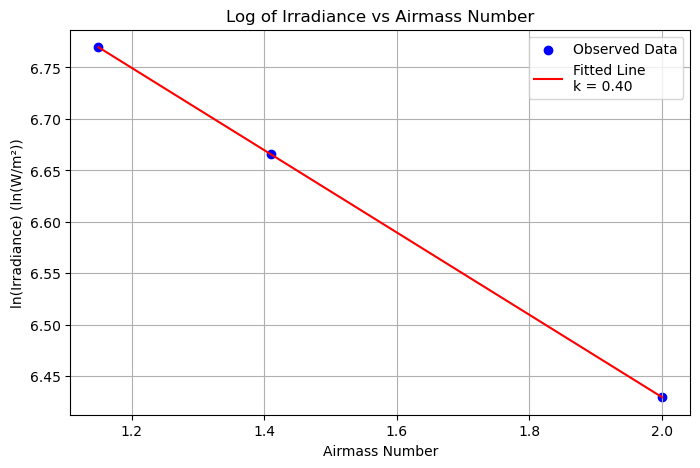

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example 10.4: Solar radiation attenuation using Beer's law
def calculate_extinction_coefficient(airmass_numbers, irradiance_values):
    """
    Calculate the extinction coefficient and unattenuated flux using a linear regression approach.

    Args:
    airmass_numbers: List of airmass numbers.
    irradiance_values: Corresponding irradiance values (W/m²).

    Returns:
    extinction_coefficient: The extinction coefficient (k).
    unattenuated_flux: The unattenuated flux (W/m²).
    """
    # Convert irradiance to natural log
    ln_irradiance = np.log(irradiance_values)

    # Perform linear regression: ln(Φ) = ln(Φ₀) - k * m
    coefficients = np.polyfit(airmass_numbers, ln_irradiance, 1)
    k = -coefficients[0]  # Slope is -k
    ln_flux_0 = coefficients[1]  # Intercept is ln(Φ₀)
    flux_0 = np.exp(ln_flux_0)  # Convert ln(Φ₀) back to Φ₀
    return k, flux_0

# Data from the example
airmass_numbers = np.array([1.15, 1.41, 2.00])  # Airmass numbers
irradiance_values = np.array([871, 785, 620])  # Irradiance values (W/m²)

# Perform calculation
extinction_coefficient, unattenuated_flux = calculate_extinction_coefficient(airmass_numbers, irradiance_values)

# Display results
print(f"Example 10.4: Extinction coefficient (k) = {extinction_coefficient:.2f} per airmass")
print(f"Unattenuated flux (Φ₀) = {unattenuated_flux:.2f} W/m²")

# Visualization of the regression
ln_irradiance_values = np.log(irradiance_values)
fitted_ln_irradiance = -extinction_coefficient * airmass_numbers + np.log(unattenuated_flux)

plt.figure(figsize=(8, 5))
plt.scatter(airmass_numbers, ln_irradiance_values, color='blue', label='Observed Data')
plt.plot(airmass_numbers, fitted_ln_irradiance, color='red', label=f'Fitted Line\nk = {extinction_coefficient:.2f}')
plt.title("Log of Irradiance vs Airmass Number")
plt.xlabel("Airmass Number")
plt.ylabel("ln(Irradiance) (ln(W/m²))")
plt.legend()
plt.grid(True)
plt.show()


Example 10.5 Results:
Emittance of person = 452.36 W/m²
Thermal irradiance from walls = 418.74 W/m²
Net radiant heat loss = 33.62 W/m²


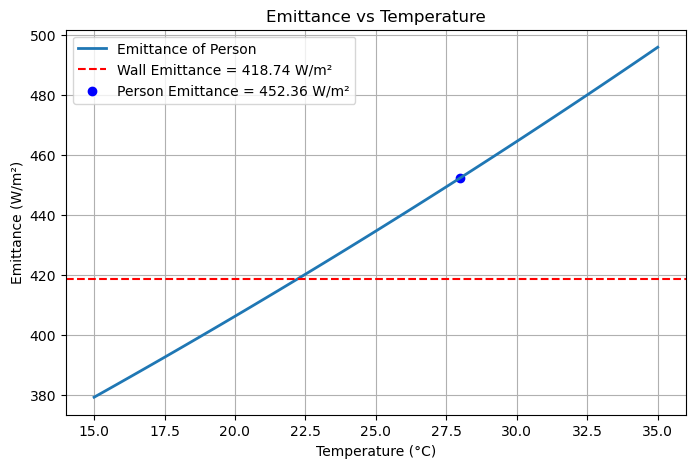

In [8]:
import numpy as np

# Example 10.5: Thermal emittance and net radiant heat loss
def stefan_boltzmann_emittance(temperature, emissivity=1.0):
    """
    Calculate emittance using the Stefan-Boltzmann law.

    Args:
    temperature: Temperature in Kelvin.
    emissivity: Emissivity of the surface (default is 1.0 for blackbody).

    Returns:
    Emittance in W/m².
    """
    sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²/K⁴)
    return emissivity * sigma * temperature**4

# Constants
emissivity_person = 0.97  # Emissivity of a person's skin
emissivity_wall = 1.0  # Emissivity of the walls
temperature_person = 273.15 + 28  # Convert to Kelvin
temperature_wall = 273.15 + 20  # Convert to Kelvin

# Calculate emittance of the person and walls
emittance_person = stefan_boltzmann_emittance(temperature_person, emissivity_person)
emittance_wall = stefan_boltzmann_emittance(temperature_wall, emissivity_wall)

# Calculate net radiant heat loss
net_radiant_heat_loss = emittance_person - emittance_wall

# Display results
print(f"Example 10.5 Results:")
print(f"Emittance of person = {emittance_person:.2f} W/m²")
print(f"Thermal irradiance from walls = {emittance_wall:.2f} W/m²")
print(f"Net radiant heat loss = {net_radiant_heat_loss:.2f} W/m²")

# Visualization
import matplotlib.pyplot as plt

temperatures = np.linspace(273.15 + 15, 273.15 + 35, 50)  # Range of temperatures in Kelvin
emittances = [stefan_boltzmann_emittance(temp, emissivity_person) for temp in temperatures]

plt.figure(figsize=(8, 5))
plt.plot(temperatures - 273.15, emittances, label="Emittance of Person", lw=2)
plt.axhline(emittance_wall, color="red", linestyle="--", label=f"Wall Emittance = {emittance_wall:.2f} W/m²")
plt.scatter([28], [emittance_person], color="blue", label=f"Person Emittance = {emittance_person:.2f} W/m²")
plt.title("Emittance vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Emittance (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


Example 10.6 Results:
Clear Sky Emissivity = 0.69
Overcast Sky Emissivity = 0.95
Clear Sky Emittance = 216.66 W/m²
Overcast Sky Emittance = 299.80 W/m²
Additional Radiant Energy on Overcast Night = 83.14 W/m²


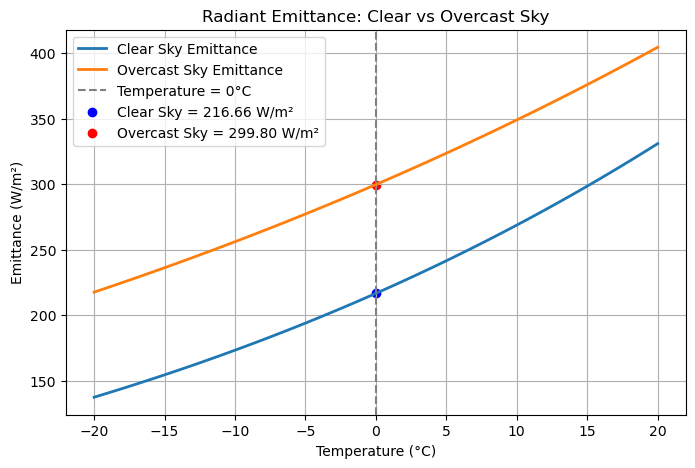

In [9]:
import numpy as np

# Stefan-Boltzmann emittance calculation
def stefan_boltzmann_emittance(temperature, emissivity=1.0):
    """
    Calculate emittance using the Stefan-Boltzmann law.

    Args:
    temperature: Temperature in Kelvin.
    emissivity: Emissivity of the surface (default is 1.0 for blackbody).

    Returns:
    Emittance in W/m².
    """
    sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m²/K⁴)
    return emissivity * sigma * temperature**4

# Clear sky emissivity formula
def clear_sky_emissivity(temperature_kelvin):
    """
    Compute emissivity for a clear sky using an empirical formula.

    Args:
    temperature_kelvin: Temperature in Kelvin.

    Returns:
    Emissivity for a clear sky.
    """
    return 9.2e-6 * temperature_kelvin**2

# Overcast sky emissivity formula
def overcast_sky_emissivity(clear_sky_emissivity):
    """
    Compute emissivity for a completely overcast sky.

    Args:
    clear_sky_emissivity: Emissivity for a clear sky.

    Returns:
    Emissivity for an overcast sky.
    """
    return 0.16 * clear_sky_emissivity + 0.84

# Input data
temperature_celsius = 0  # Temperature in Celsius
temperature_kelvin = 273.15 + temperature_celsius  # Convert to Kelvin

# Compute clear sky emissivity and emittance
emissivity_clear_sky = clear_sky_emissivity(temperature_kelvin)
emittance_clear_sky = stefan_boltzmann_emittance(temperature_kelvin, emissivity_clear_sky)

# Compute overcast sky emissivity and emittance
emissivity_overcast_sky = overcast_sky_emissivity(emissivity_clear_sky)
emittance_overcast_sky = stefan_boltzmann_emittance(temperature_kelvin, emissivity_overcast_sky)

# Compute the difference in emittance
difference_in_emittance = emittance_overcast_sky - emittance_clear_sky

# Display results
print(f"Example 10.6 Results:")
print(f"Clear Sky Emissivity = {emissivity_clear_sky:.2f}")
print(f"Overcast Sky Emissivity = {emissivity_overcast_sky:.2f}")
print(f"Clear Sky Emittance = {emittance_clear_sky:.2f} W/m²")
print(f"Overcast Sky Emittance = {emittance_overcast_sky:.2f} W/m²")
print(f"Additional Radiant Energy on Overcast Night = {difference_in_emittance:.2f} W/m²")

# Visualization
import matplotlib.pyplot as plt

# Temperature range for visualization
temperatures_celsius = np.linspace(-20, 20, 100)
temperatures_kelvin = temperatures_celsius + 273.15

# Compute emittance for clear and overcast skies
clear_sky_emittance_values = [stefan_boltzmann_emittance(T, clear_sky_emissivity(T)) for T in temperatures_kelvin]
overcast_sky_emittance_values = [
    stefan_boltzmann_emittance(T, overcast_sky_emissivity(clear_sky_emissivity(T))) for T in temperatures_kelvin
]

plt.figure(figsize=(8, 5))
plt.plot(temperatures_celsius, clear_sky_emittance_values, label="Clear Sky Emittance", lw=2)
plt.plot(temperatures_celsius, overcast_sky_emittance_values, label="Overcast Sky Emittance", lw=2)
plt.axvline(temperature_celsius, color="gray", linestyle="--", label=f"Temperature = {temperature_celsius}°C")
plt.scatter([temperature_celsius], [emittance_clear_sky], color="blue", label=f"Clear Sky = {emittance_clear_sky:.2f} W/m²")
plt.scatter([temperature_celsius], [emittance_overcast_sky], color="red", label=f"Overcast Sky = {emittance_overcast_sky:.2f} W/m²")
plt.title("Radiant Emittance: Clear vs Overcast Sky")
plt.xlabel("Temperature (°C)")
plt.ylabel("Emittance (W/m²)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Constants
energy_content_par = 2.35e5  # J/mol for PAR (Photosynthetically Active Radiation)

# Problem 10.2 Inputs
energy_flux_density_10_2 = 200  # W/m²

# Calculate PPFD for Problem 10.2
ppfd_10_2 = energy_flux_density_10_2 / energy_content_par * 1e6  # Convert to µmol/m²/s
print(f"Problem 10.2: PPFD = {ppfd_10_2:.2f} µmol/m²/s")

# Problem 10.3 Inputs
ppfd_10_3 = 1000  # µmol/m²/s

# Calculate energy flux density for Problem 10.3
energy_flux_density_10_3 = ppfd_10_3 * 1e-6 * energy_content_par  # W/m²
total_flux_density_10_3 = 2 * energy_flux_density_10_3  # Total solar radiation
print(f"Problem 10.3: Energy Flux Density in PAR = {energy_flux_density_10_3:.2f} W/m²")
print(f"Problem 10.3: Total Solar Radiation = {total_flux_density_10_3:.2f} W/m²")


Problem 10.2: PPFD = 851.06 µmol/m²/s
Problem 10.3: Energy Flux Density in PAR = 235.00 W/m²
Problem 10.3: Total Solar Radiation = 470.00 W/m²
